# MNIST Digit Classification Project

This project demonstrates a complete end-to-end implementation of a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The model architecture and training process leverage TensorFlow and Keras, while the final deployment of the model uses Gradio to create an interactive web interface.

## Project Overview

1. **Data Preprocessing**: Load and prepare the MNIST dataset for training and testing.
2. **Model Architecture**: Develop a CNN model with multiple convolutional and pooling layers to classify digits accurately.
3. **Training Process**: Use early stopping to avoid overfitting and optimize model accuracy.
4. **Evaluation**: Assess the model’s performance using a test set to determine final accuracy.
5. **Deployment**: Use Gradio to create an interactive demo for real-time digit classification.

### Install and import libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


### Data Preprocessing


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

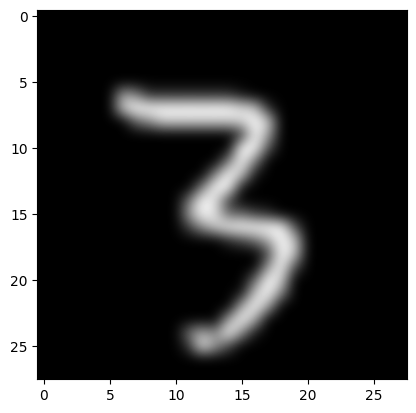

In [5]:
plt.imshow(train_images[44], cmap='gray', interpolation='bicubic')

In [6]:
train_labels[44]

3

#### Reshape and normalize images, and convert labels to categorical format for model training.


In [7]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [8]:
train_images[44]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
train_labels[94]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

#### Model Architecture
Define the CNN architecture, including convolutional, pooling, and dense layers.


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/lia/Desktop/Upgrade_Hub/entorno_3_11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Model Compilation and Training

Compile the model with the Adam optimizer and categorical cross-entropy loss. Implement early stopping to avoid overfitting.

In [12]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [13]:

early_stopping = EarlyStopping(monitor='accuracy', patience=2)
model.fit(train_images, train_labels, epochs=5, batch_size=32,  callbacks=[early_stopping])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8900 - loss: 0.3451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9850 - loss: 0.0491
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9904 - loss: 0.0323
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9929 - loss: 0.0245
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9940 - loss: 0.0200


#### Model Evaluation
Evaluate the trained model on the test set and save the model.

In [14]:
#aqui comprobamos el modelo con el conjunto de test y nos daria la precision del modelo basado en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)  
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0346
Test accuracy: 0.9902999997138977


In [15]:
model.save('mnist_model.keras')

#### Model Visualization
Use Netron to visualize the model structure:

In [16]:
import netron

In [17]:
netron.start('mnist_model.keras')

Serving 'mnist_model.keras' at http://localhost:8080


('localhost', 8080)

#### Interactive Deployment with Gradio
Load the saved model and create an interface to classify user-drawn digits.

In [1]:
import gradio as gr
import numpy as np
import tensorflow as tf

In [ ]:
modelo = tf.keras.models.load_model("mnist_model.keras")

def clasificar_imagenes(img):
    img = np.reshape(img, (1,28, 28, 1)).astype("float32") / 255
    predicciones = modelo.predict(img)
    digito_predicho = np.argmax(predicciones)
    return str(digito_predicho)

interfaz = gr.Interface(fn=clasificar_imagenes , inputs="sketchpad", outputs="label")
interfaz.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
